#### PROBLEM 6: DBSCAN on toy raw data
Three toy 2D datasets are provided (or they can be obtained easily with scikit learn) circles; blobs, and moons. Run your own implementation of DBSCAN on these, in two phases.


In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
def check_core_point(eps,minPts, df, index):
    #get points from given index
    x, y = df.iloc[index]['x']  ,  df.iloc[index]['y']
    temp =  df[((np.abs(x - df['x']) <= eps) & (np.abs(y - df['y']) <= eps)) & (df.index != index)]
    
    if len(temp) >= minPts:
        return (temp.index , 1)
    
    elif (len(temp) < minPts) and len(temp) > 0:
        return (temp.index , 2)
    
    elif len(temp) == 0:
        return (temp.index , 3)

In [3]:
def dbscan(eps, minPts, df):
    
    #initiating cluster number
    cluster_num = 0

    q = set()
    unvisited = list(df.index)
    clusters = []
    
    
    while (len(unvisited) > 0): #run until all points have been visited

        #identifier for first point of a cluster
        first_point = True
        
        #choose a random unvisited point
        q.add(random.choice(unvisited))
        
        while len(q) > 0:
            
            pop = q.pop()
            unvisited.remove(pop)
            
            neighbor_ind, point_type = check_core_point(eps, minPts, df, pop)
            
            #dealing with an edge case
            if point_type == 2 and first_point:
                
                clusters.append((pop, -1))
                for ind in neighbor_ind:
                    clusters.append((ind, -1))

                unvisited = [element for element in unvisited if element not in neighbor_ind]
                continue

            first_point = False
            
            #CORE POINT
            if point_type == 1:
                clusters.append((pop,cluster_num))
                neighbor_ind = set(neighbor_ind) & set(unvisited)
                q.update(neighbor_ind)

            #BORDER POINT
            elif point_type == 2:
                clusters.append((pop,cluster_num))
            
            #OUTLIER
            elif point_type == 3:
                clusters.append((pop, -1))
                
        if not first_point:
            cluster_num += 1
        
    return clusters

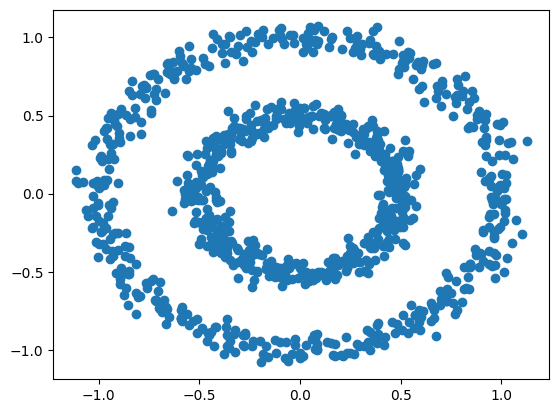

In [4]:
data_circle = pd.read_csv(r'circle.csv')
df_circle = pd.DataFrame(data_circle, columns=['Xcircle_X1', 'Xcircle_X2'])

df_circle.rename(columns={'Xcircle_X1': 'x', 'Xcircle_X2':'y'}, inplace = True)

x = df_circle['x']
y = df_circle['y']

plt.scatter(x, y)
plt.show()


Text(0, 0.5, 'Y')

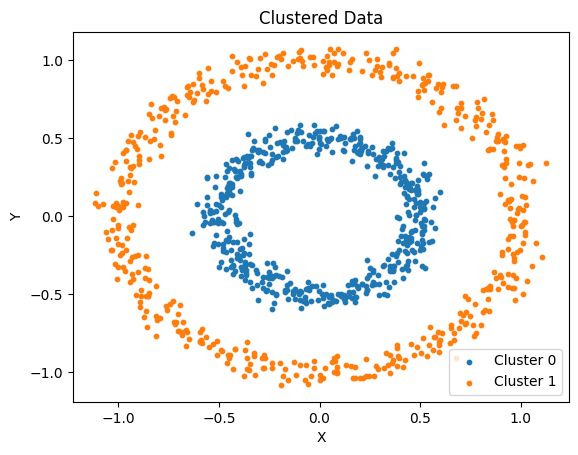

In [5]:
epsilon = 0.1
minPts = 5

clustered = dbscan(epsilon, minPts, df_circle)

idx , cluster = list(zip(*clustered))

cluster_df = pd.DataFrame(clustered, columns = ["ind", "cluster"])

raw_circle_data = df_circle.to_numpy()


for clust in np.unique(cluster):
    plt.scatter(raw_circle_data[cluster_df["ind"][cluster_df["cluster"] == clust].values, 0], raw_circle_data[cluster_df["ind"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')

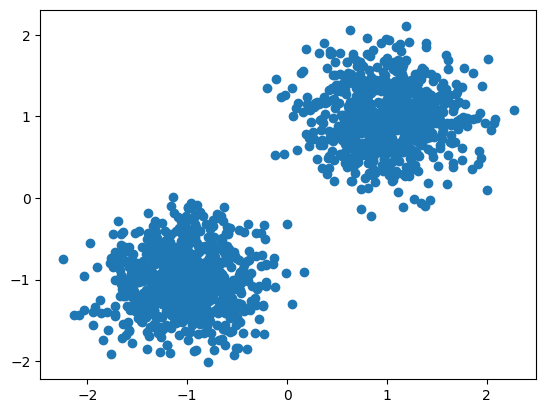

In [6]:
data_circle = pd.read_csv(r'blobs.csv')
df_blobs = pd.DataFrame(data_circle, columns=['Xblobs_X1', 'Xblobs_X2'])

df_blobs.rename(columns={'Xblobs_X1': 'x', 'Xblobs_X2':'y'}, inplace = True)

x = df_blobs['x']
y = df_blobs['y']

plt.scatter(x, y)
plt.show()


Text(0, 0.5, 'Y')

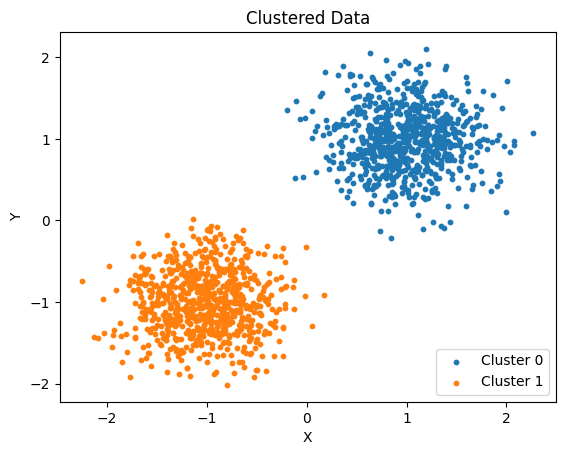

In [7]:
epsilon = 0.5
minPts = 5

clustered = dbscan(epsilon, minPts, df_blobs)

idx , cluster = list(zip(*clustered))

cluster_df = pd.DataFrame(clustered, columns = ["ind", "cluster"])

raw_blob_data = df_blobs.to_numpy()

for clust in np.unique(cluster):
    plt.scatter(raw_blob_data[cluster_df["ind"][cluster_df["cluster"] == clust].values, 0], raw_blob_data[cluster_df["ind"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')

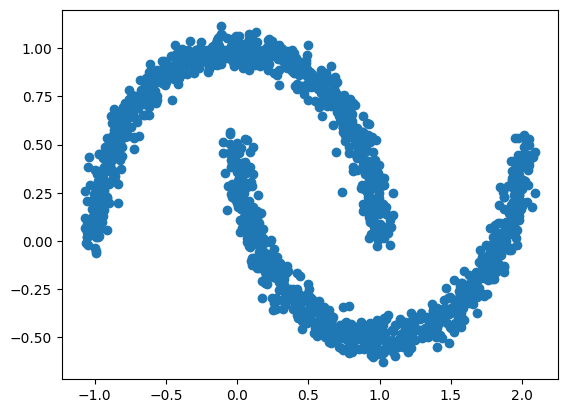

In [8]:
data_moons = pd.read_csv(r'moons.csv')
df_moons = pd.DataFrame(data_moons, columns=['Xmoons_X1', 'Xmoons_X2'])

df_moons.rename(columns={'Xmoons_X1': 'x', 'Xmoons_X2':'y'}, inplace = True)

x = df_moons['x']
y = df_moons['y']

plt.scatter(x, y)
plt.show()


Text(0, 0.5, 'Y')

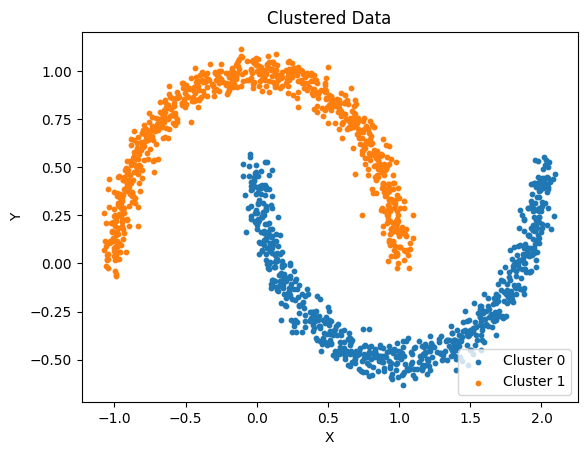

In [9]:
epsilon = 0.2
minPts = 5

clustered = dbscan(epsilon, minPts, df_moons)

idx , cluster = list(zip(*clustered))

cluster_df = pd.DataFrame(clustered, columns = ["ind", "cluster"])

raw_moon_data = df_moons.to_numpy()

for clust in np.unique(cluster):
    plt.scatter(raw_moon_data[cluster_df["ind"][cluster_df["cluster"] == clust].values, 0], raw_moon_data[cluster_df["ind"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')